<a href="https://colab.research.google.com/github/neon-iot/communication_labs/blob/main/detection_theory/notebooks/SpectrumSensing_GroupFormer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENSADO DE ESPECTRO: detección para modelo Gaussiano y Chi-cuadrado de la señal de energía

## Narella Cerquetti, Ignacio Ibañez Salas,...


## Introducción

*Radios Cognitivas* o *Cognitive Radios* es un paradigma de las comunicaciones inalámbricas (*wireless comunication*) en el cual tanto las redes como los nodos inalámbricos varían sus parámetros de transmisión y/o recepción para poder efectuar un intercambio de información (comuniacación entre pares) de forma más eficiente sin interferir con otros usuarios. La modificación de los parámetros está basada en la observación de distintos factores tales como el espectro de radiofrecuencia, el comportamiento del usuario o el estado de la red.

De manera general, las radios cognitivas examinan el ambiente electromagnético en el que están operando, detectan las bandas de frecuencia que no están siendo utilizadas, y adaptan sus parámetros de trabaja para trasmitir su información dentro de dichas bandas. Así, el *sensado de espectro* cumple un rol fundamental en el rendimiento de esta tecnología; la detección correcta de las bandas de frecuencia en uso determina la performance de la comunicación entre pares establecida por el sistema.

## Sensado de espectro

Como ya se mencionó, una de las tareas principales en las radios cognitivas es que el usuario (o nodo) que desea hacer una transmisión (denominado *usuario secundario*, SU) debe, primeramente verificar las bandas de frecuencia permitidas que no están siendo ocupadas por un *usuario primario*, PU, para de esta manera evitar interferencia entre las señales.

Así, el sensado de espectro es una técnica utilizada para determinar si un determinado ancho de banda está siendo ocupado por algún usuario primario.

Existen diferentes métodos a partir de los cuales un nodo puede decidir si un cierto ancho de banda está disponible para su uso o no, pero independientemente de cuál sea la opción escogida todas ellas consisten en realizar un test de hipótesis binaria donde:

*   $H_0:$ Ausencia de usuario primario (canal libre de señal)
*   $H_1:$ Presencia de usuario primario (canal ocupado)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as scs

## Detector de Energía

La determinación de la ocupación o no de un canal mediante el método del $Detector$ $de$ $Energía$ se basa en comparar el nivel de energía de la señal captada por el receptor con un $threshold$ (umbral de enrgía), simbolizado como $\lambda$, que se obtiene a partir de la señal de ruido propia del canal. Es decir, este método se basa en el principio que la energía de una señal transmitida siempre es mayor que la energía de la señal de ruido propia del canal.

La señal capturada por el receptor a partir de la cual se realiza la detección es $Y(n)$, donde:


*   $Y(n) = W(n)$; si no hay presencia de señal,
*   $Y(n) = S(n) + W(n)$; si se está transmitiendo una señal.

$S(n)$ se corresponde con la señal transmitida por un usuario primario mientras que $W(n)$ es el ruido Gaussiano de media cero adicionado por el canal.


Lo que se compara con el threshold es la energía de la señal receptada por el nodo, la cual se calcula para cualquier señal como:

$E = \int_{T_0} |Y(t)|^2 \cdot dt$

donde $Y(t)$ es la señal observada y $T_0$ es el intervalo de duración (o intervalo de análisis) de la señal.

El nodo receptor tomará muestras de la señal que está capturando resultando así en una discretización de la señal original. En consecuencia el estadístico de prueba utilizado finalmente resulta: 

$T = \sum_{n=1}^{N}|Y(n)|^2$ [1]

donde $N$ se corresponde con la cantidad de muestras tomadas de la señal capturada. 

El estadístico $T$ se compara con el threshold $\lambda$, este threshold es la energía del ruido intrínseco del canal

Si $T > λ$ el detector concluirá que el canal está ocupado, es decir que una señal primaria está siendo trasmitida a través de él; esto es el test de hipótesis se decidirá por $H_1$. En caso contrario la detección indicará que el canal está disponible lo que implica que el test de hipótesis se resuelva por $H_0$.


### Parámentros de análisis

La performance del detector de energía se caracteriza através de 3 parámetros basados en estadísticos de prueba bajo hipótesis binaria:


*   **Probabilidad de Detección, $P_D$:** Probabilidad que la decisión tomada haya sido la 
correcta.
*   **Probabilidad de Falsa Alarma, $P_{FA}$:** Probabilidad que la decisión tomada indique presencia de señal en el canal pero esta esté ausente.
*   **Probabilidad de Detección Perdida, $P_{MD}$:** Probabilidad que la decisión tomada indique ausencia de señal en el canal pero esta esté presente.




###Detector de Energía en canales Gaussianos

Si el comportamiento del canal puede modelarse como *Ruido Blanco Gaussiano* tal que para un canal desocupado cada muestra tomada del mismo puede suponerse una variable aleatorial de distribución gaussiana de *media* 0 y varianza $σ_w^2$:

$W(n) \thicksim N(0, σ_w^2)$

la distribución del estadístico de prueba $T_0$ para la hipótesis $H_0$ se corresponde a una distribución $chi_2$ de media cero, $χ^{2}_{N}$, donde la cantidad de muestras $N$ determina los grados de libertad [4].

De igual manera la distribución del estadístico $T_1$ para la $H_1$ puede representarse mediante una distribución $chi_2$ no centrada, $χ^{2}_{N}(2\cdot γ)$, sindo $\gamma$ la relación señal-ruido y $N$ los grados de libertad [4].

De esta forma queda planteado:


$T \thicksim \left\{ \begin{array}{lcc}
             H_0:  χ^{2}_{N}\\ \qquad \qquad \qquad \qquad \qquad [4]
             \\ H_1: χ^{2}_{N}(2\cdot γ) \\
             \end{array}
   \right.$

Ahora bien, si al cantidad de muestras que se ha tomado del canal es lo suficientemente grande surge una simplificación respecto a la distribución del estadístico $T$ ya que su comportamiento en esas circunstancias puede aproximarse a una distribución Gaussinana. Con esta aproximación las distribuciones del estadístico para ambas hipótesis resultan como se muestra a continuación:

$T \thicksim \left\{ \begin{array}{lcc}
             H_0:  Z(Nσ_{n}^2, 2Nσ_{n}^2)\\  \qquad \qquad \qquad \qquad
             \qquad \qquad \qquad \qquad \qquad [1]
             \\ H_1: Z(N(σ_{n}^2 + σ_{s}^2), 2N(σ_{s}^2 + σ_{s}^2)^2) \\
             \end{array}
   \right.$


Para canales Gaussianos, y para muestras lo suficientemente grandes tal que el comportamiento del estadístico se aproxima de un comportamieto Gaussiano, las probabilidades $P_D$, $P_{FA}$ y $P_{MD}$ están dadas por las siguientes ecuaciones [1]:

$P_D = P(T>\lambda | H_1) = Q \left( \frac{λ - N(σ_{n}^2 + σ_{s}^2)}{\sqrt{2N(σ_{n}^2 + σ_{s}^2)^2}}\right) $

$P_{FA} = P(T>\lambda | H_0) = Q \left( \frac{λ - Nσ_{n}^2}{\sqrt{2Nσ_{n}^4}}\right) $

$P_{MD} = 1 - P_D$


Para canales Gaussianos donde no se aplica la simplificación antes mencionada las probabilidades $P_D$, $P_{FA}$ y $P_{MD}$ están dadas por las siguientes ecuaciones:

$P_D = P(T>\lambda | H_1) = F \left( \frac{λ}{σ_{n}^2 + σ_{s}^2}, N\right) $

$P_{FA} = P(T>\lambda | H_0) = F \left( \frac{λ}{σ_{n}^2}, N\right)\qquad \qquad [4]$

$P_{MD} = 1 - P_D$

donde la función $F$ es la función de *supervivencia* de la distribución $χ_2$ y $N$ los grados de libertad. Notar que $F(x) = 1 - P(∞ < T < x)$ y $Q(x) = 1 - P(∞ < T < x)$ son las funciones de supervivencia de la densidad de probailidad $χ_2$ y gaussiana, respectivamente.

### Determinación del $threshold$

El threshold de decisión puede calcularse a partir de la *probabilidad de falsa alarma* si esta se tiene como dato. En las secciones que siguen se indica cómo calcular el mismo para el caso que el comportamiento del estadístico $T$ se aproxime con una distribución gaussiana o haciendo uso de la distribución $χ_2$.

#### Calculo de threshold para la distribución Gaussiana

El umbral de decisión para el caso donde se aproxima la distribución del estadístico a un comportamiento Gaussiano se deriva de la expresión de cálculo de la $P_{FA}$ como se muestra a continuación:

$λ = Q^{-1}(P_{FA}) \cdot \sqrt{2Nσ_{n}^4} + Nσ_{n}^2$

#### Cálculo de threshold para la distribución $χ_2$

El umbral de decisión para el caso donde se considera una distribución $χ_2$ para el estadístico de prueba también puede calcularse a partir de la $P_{FA}$ de la siguiente manera:

$λ = F^{-1}(P_{FA}, N) \cdot σ_{n}^2$

### Resultados y análisis

A continuación se estudia el desempeño de un sistema de sensado de espectro por detección de energía en el canal de tranmisión. El respectivo análisis se hace en función a la actuación del sistema de sensado para distintos valores de relación señal ruido y para una $P_{FA}$ fija deseada del $5\%$. A su vez se comparan los resultados obtenidos por medio del uso de la distribución $χ^2$ y la aproximación Gaussiana.

In [23]:
# PARAMETERS
sigma_s = 1           # desviación de la señal primaria
P_FA = 0.05           # probabilidad de falso positivo deseada
num_samples = 4000    # número de muestras
num_stats = 1000      # cantidad de veces que se repite el test
# SNR set up
SNR_LOW = -20           
SNR_UP = 6
SNR_STEP = 2

In [24]:
def generate_statistic(num_stats, sigma_w, num_samples, test_signal):

  T = []

  if test_signal == False:        # si se está testeando un canal sin señal

    for ind in range(num_stats):
      # noise signal
      w = sigma_w * np.random.randn(num_samples)
      # sample
      y = w

      # Calculate test statistic
      T.append(np.sum(np.square(np.abs(y))))

    return T

  else:                           # si se está testeando un canal con señal

    for ind in range(num_stats):
      # signal
      x = sigma_s * np.random.randn(num_samples)
      # noise
      w = sigma_w * np.random.randn(num_samples)
      # sample
      y = x + w

      # Calculate test statistic
      T.append(np.sum(np.square(np.abs(y))))

    return T

In [25]:
SNR_list = np.arange(SNR_LOW, SNR_UP, SNR_STEP)

P_FA_THEO = np.zeros(len(SNR_list))
P_D_THEO = np.zeros(len(SNR_list))

P_M_CALC = np.zeros(len(SNR_list))
P_D_CALC = np.zeros(len(SNR_list))

P_D_THEO_NORM = []
                      
lambdas = []                   # threshold chi2
lambdas_norm = []              # threshold norm
T_to_plot = []

# Evaluate the performance on H0 and H1
for ind, SNR in enumerate(SNR_list):
    NUM_FALSE_ALARM = 0
    NUM_DETECTION = 0
    NUM_MISS_DETECTION = 0

    # Standard deviation calculation for the noise signal
    sigma_w = np.sqrt(sigma_s ** 2 / 10 ** (SNR / 10))

    # Energy threshold calculation
    # Chi2
    lambda_ = scs.chi2.isf(q=P_FA, df=num_samples) * (sigma_w ** 2)
    lambdas.append(lambda_)
    # Gaussian
    l_ = scs.norm.isf(P_FA) * np.sqrt(2*num_samples*sigma_w**4) + num_samples*sigma_w**2
    lambdas_norm.append(l_)

    # Test static calculation
    T_y_0 = generate_statistic(num_stats, sigma_w, num_samples, False)
    T_y_1 = generate_statistic(num_stats, sigma_w, num_samples, True)

    if ind == 6:
      T_to_plot.append(T_y_0)
      T_to_plot.append(T_y_1)

    # Decision making (spectrum sensing)
    for T in T_y_0:
        if T >= lambda_:
            NUM_FALSE_ALARM += 1

    for T in T_y_1:
        if T >= lambda_:
            NUM_DETECTION += 1
        else:
            NUM_MISS_DETECTION += 1

    # Probabilities
    # Aproximations (mean)
    P_M_CALC[ind] = NUM_MISS_DETECTION / num_stats
    P_D_CALC[ind] = NUM_DETECTION / num_stats

    # Theorical
    # Pfa definida
    P_FA_THEO[ind] = P_FA
    # Pd calculada por chi2
    P_D_THEO[ind] = scs.chi2.sf(x=lambda_ / (sigma_s ** 2 + sigma_w ** 2), df=num_samples)
    # Pd calculada por norm
    P_D_THEO_NORM.append(scs.norm.sf(x=l_ ,loc=num_samples*(sigma_w**2+sigma_s**2), scale=np.sqrt(2*num_samples*(sigma_w**2+sigma_s**2)**2)))

En las tablas que siguen se muestran los resultados obtenidos en el cálculo de la *probabilidad de detección* y en los valores de *threshold* para cada *SNR*. En ambos casos queda comprobado que la aproximación al comportamiendo del estadístico de prueba $T$ a una distribución Gaussiana es correcto ya que los resultados obtenidos son prácticamente idénticos.

In [26]:
# Comparative Table
print('PROBABILITIES TABLE')
print()
print('SNR          Prob. of Detection (aprox)          Prob. of Detection (Gaussian)          Prob. of Detection (Chi2) ')
print('----------------------------------------------------------------------------------------------------------------------')

for pd in range(len(SNR_list)):

  if P_D_CALC[pd] == 1.0:
    print(SNR_list[pd], '                    ',round(P_D_CALC[pd], 4), '                              ', round(P_D_THEO_NORM[pd], 4), '                                ', round(P_D_THEO[pd], 3))
    continue

  print(SNR_list[pd], '                 ', round(P_D_CALC[pd], 4), '                             ', round(P_D_THEO_NORM[pd], 4), '                              ', round(P_D_THEO[pd], 3))

PROBABILITIES TABLE

SNR          Prob. of Detection (aprox)          Prob. of Detection (Gaussian)          Prob. of Detection (Chi2) 
----------------------------------------------------------------------------------------------------------------------
-20                   0.093                               0.1179                                0.116
-18                   0.184                               0.1784                                0.175
-16                   0.297                               0.3055                                0.299
-14                   0.55                               0.5519                                0.544
-12                   0.857                               0.8659                                0.864
-10                   0.994                               0.9949                                0.995
-8                      1.0                                1.0                                  1.0
-6                      1.0       

In [27]:
# Thresholds Table

print('THRESHOLD TABLE')
print()
print('SNR                           threshold CHI2                       threshold NORM')
print('-------------------------------------------------------------------------------------')

for threshold in range(len(SNR_list)):

  print(SNR_list[threshold],'                           ' ,round(lambdas[threshold], 4), '                          ', round(lambdas_norm[threshold], 4))

THRESHOLD TABLE

SNR                           threshold CHI2                       threshold NORM
-------------------------------------------------------------------------------------
-20                             414824.8404                            414712.0181
-18                             261736.7798                            261665.5937
-16                             165144.7435                            165099.8281
-14                             104199.2888                            104170.9491
-12                             65745.3066                            65727.4254
-10                             41482.484                            41471.2018
-8                             26173.678                            26166.5594
-6                             16514.4744                            16509.9828
-4                             10419.9289                            10417.0949
-2                             6574.5307                            6572.7425
0    

En las gráficas siguientes se comprueba una vez más que puede lograrse una muy buena aproximación a la descripción de la distribución del estadístico $T$ asociando a la misma al comportamiento de una campana Gaussiana. En las imagenes se observan las distribuciones obtenidas para el estadístico $T$ para el caso de $SNR=-20$ y $SNR=6$ con señal ausente y presente en el canal. 

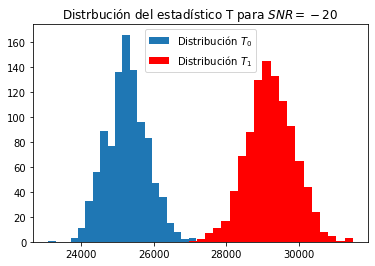

In [28]:
plt.hist(T_to_plot[0], bins=20, label="Distribución $T_0$")
plt.hist(T_to_plot[1], bins=20, color="red", label="Distribución $T_1$")
plt.title("Distrbución del estadístico T para $SNR=-20$")
plt.legend()
plt.show()

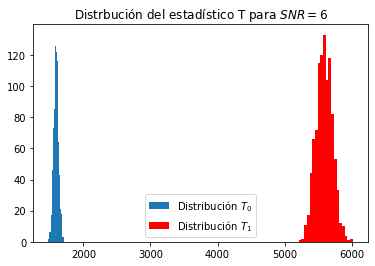

In [29]:
plt.hist(T_y_0, bins=20, label="Distribución $T_0$")
plt.hist(T_y_1, bins=20, color="red", label="Distribución $T_1$")
plt.title("Distrbución del estadístico T para $SNR=6$")
plt.legend()
plt.show()

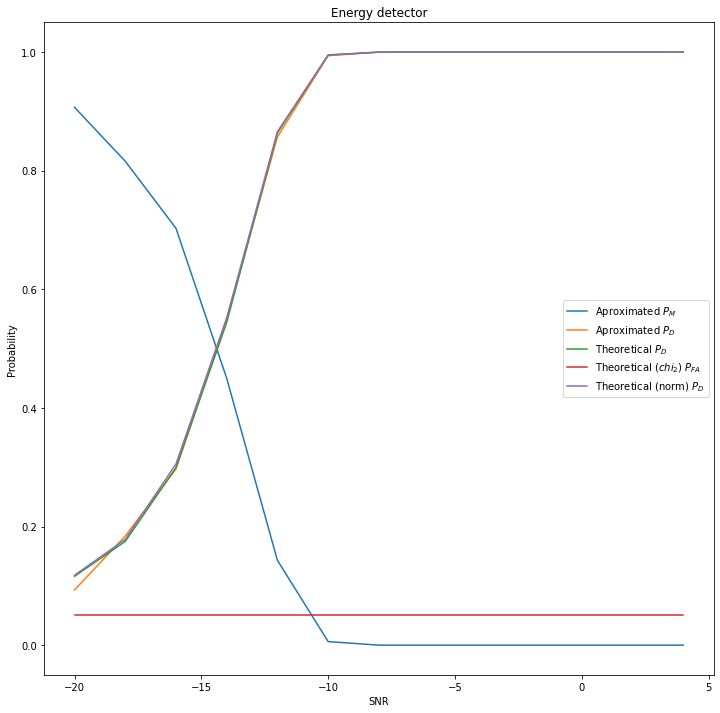

In [30]:
# Plot and save the results
plt.figure(figsize=(12,12))
plt.plot(SNR_list, P_M_CALC, label="Aproximated $P_{M}$")
plt.plot(SNR_list, P_D_CALC, label="Aproximated $P_{D}$")
plt.plot(SNR_list, P_D_THEO, label="Theoretical $P_{D}$")
plt.plot(SNR_list, P_FA_THEO, label="Theoretical ($chi_{2}$) $P_{FA}$")
plt.plot(SNR_list, P_D_THEO_NORM, label="Theoretical (norm) $P_{D}$")
plt.xlabel("SNR")
plt.ylabel("Probability")
#plt.yscale('log')
plt.title("Energy detector")
plt.legend()
#plt.savefig('./results/energy_detector_a.png')
plt.show()

De la gráfica anterior resulta claro que la performance de un sistema de sensado de espectro basado en la detección de energía mejora considerablemente a medida que aumenta la relación señal ruido. 

Como puede apreciarse, para valores de $SNR$ muy bajos la probabilidad de detección de un usuario primario en el canal es muy baja; mientras que la probabilidad de que estando el canal ocupado el detector indique la ausencia de señal es elevada. A medida que se incrementa la relación señal ruido la $P_D$ crece exponencialmente y la $P_M$ decae muy rápido.

## Filtro Matcheado

La técnica de $Filtro$ $Matcheado$ consiste implementar a la salida del canal que se quiere analizar un filtro apareado cuya función principal es detectar la presencia de una señal conocida, o de referencia, dentro de una señal recibida. La característica de este tipo de filtros es que su respuesta al impulso, $h(n)$, es una versión invertida de la señal de referencia que se desea detectar la cual se denomina $x_p(n)$. 

Para este caso la señal de referencia $x_p(n)$ [2] representa la señal transmitida por un usuario primario.

La respuesta al impulso del canal resulta entonces:

$h(n) = x_p(-n)$ [2]

La señal que llega a la entrada del filtro desde el canal es $S(n)$ donde:

$S(n) \thicksim \left\{ \begin{array}{lcc}
             W(n) \qquad \qquad \quad \text{si el canal está desocupado}\\ 
             \\ x_p(n) + W(n)  \qquad \text{si el canal está ocupado}\\
             \end{array}
   \right.$

donde $W(n)$ se corresponde con la señal de ruido propio del canal. Debido a la aleatoriedad del ruido del canal $W(n)$ puede modelarse como una variable aleatoria de distribución gaussiana como se muestra a continuación:

$W(n) \thicksim N(0, σ_w^2)$

Una vez que $S(n)$ ha pasado el filtro, la señal que finalmente llega al detector es $Y(n)$, es decir la respuesta del filtro. $Y(n)$ resulta de la convolución entre la respuesta del filtro $h(n)$ y la señal de entrada al filtro $S(n)$:

$Y(n) = \sum^{\infty}_{k=-∞} h(n-k) \cdot S(k)$     [1]

Dado que $h(n) = x_p(-n)$, la expresión de convolución resulta:

$Y(n) = \sum^{\infty}_{k=-∞} x_p(k-n) \cdot S(k)$

Al igual que en el caso del detector de energía, el test de hipótesis se realiza a través de la comparación con un determinado $threshold$ el cual, para esta técnica, es dependiente de la energía de la señal primaria como se verá en los incisos siguientes. 

El estadístico de prueba con el cual se realiza la comparación es:

$T_{MFD} = \sum_{N} Y(n) \cdot x_p^*(n)$   [2]

El comportamiento del estadístico puede describirse a través de una distribución guassiana tanto para la hipótesis $H_0$ como para la hipótesis $H_1$ tal que:

$T_{MFD} \thicksim \left\{ \begin{array}{lcc}
             H_0:  Z(0, \sqrt{E ⋅ σ_{n}^2 })\\ \qquad \qquad \qquad \qquad \qquad [3]
             \\ H_1: Z(E, \sqrt{E ⋅ σ_{n}^2 }) \\
             \end{array}
   \right.$

donde $E$ es la energía de la señal de referencia y $σ_n$ la varianza de la señal de ruido del canal.

### Parámetros de análisis

Al igual que en el detector de energía la performance de la técnica de filtro matcheado se determina por medio de los mismos 3 parámetros:


*   **Probabilidad de Detección, $P_D$:** Probabilidad que la decisión tomada tras la comparación con el threshold haya sido la 
correcta.
*   **Probabilidad de Falsa Alarma, $P_{FA}$:** Probabilidad que la decisión tomada indique presencia de señal en el canal pero esta esté ausente.
*   **Probabilidad de Detección Perdida, $P_{MMF}$:** Probabilidad que la decisión tomada indique ausencia de señal en el canal pero esta esté presente.

Los cálculos de las probabilidades pueden efectuarese a partir de la función $Q$ debido a la distribución gaussiana que presenta el estadístico [1] [3]:

$P_D = P(T>\lambda | H_1) = Q \left( \frac{λ - E}{\sqrt{E ⋅ σ_{n}^2 }}\right) $

$P_{FA} = P(T>\lambda | H_0) = Q \left( \frac{λ}{\sqrt{E ⋅ σ_{n}^2 }}\right) $

$P_{MMF} = 1 - P_D$


### Cálculo del $threshold$

Igual que en el caso del detector de energía es posible despejar el threshold a part de la *probabilidad de falsa alarma* si esta se fija en un valor determinado:

$λ = Q^{-1}(P_{FA}) \cdot \sqrt{E ⋅ \sigma_n^2}  \qquad [1][3]$

De la expresión se observa que el valor umbral depende de la energía de la señal primaria conocida y no solo de la señal de ruido del canal.

### Resultados y análisis

Al igual que en el caso anterior, la performance del sistema se estudia para distintos valores de $SNR$ y un valor fijo de $P_{FA}$ igual al $5\%$.

In [31]:
def rrcosinefilter(tt,beta,Ts,shift):
  # tt: intervalo de tiempo
  # beta: roll-off
  # Ts: tiempo de símbolo
  # shift: desplazamiento para cada uno
  rrc = (1/np.sqrt(Ts))*np.sinc((tt-shift)/Ts)*np.cos(np.pi*beta*(tt-shift)/Ts)/(1-(2*beta*(tt-shift)/Ts)**2)

  return rrc

def get_signal(simbolos,beta,Ts,tt):

  signal_added = 0
  signal = []

  for symb in range(len(simbolos)):
    signal.append(simbolos[symb]*rrcosinefilter(tt,beta,Ts,symb*Ts))
    signal_added = signal_added+signal[symb]

  return signal_added

In [32]:
def generate_statisticMTF(num_stats, x_p, sigmaS, sigmaW, signal_state=False):

  T = []
  add_signal = 0

  if signal_state:
    add_signal = 1
  else:
    add_signal = 0

  for i in range(num_stats):
    # Transmitted signal
    x = sigmaS * x_p * add_signal
    # Noise
    w = sigmaW * np.random.randn(len(x))
    # Matched filter impulse response
    flipped_xp = np.flip(x_p)       
    # Recieved signal --> output of the filter
    y = np.convolve((x + w), flipped_xp, 'same')

    # Test static calculation
    T_aux = y * np.conjugate(x_p)
    if signal_state:
      T.append(np.abs(np.sum(T_aux)))
    else:
      T.append(np.sum(T_aux))

  return np.array(T)

Para efectuar el análisis de esta técnica de sensado de espectro se supone a la señal primaria con un comportamiento similar al que se muestra en la gráfica inferior y se toma la versión invertida de ésta señal como respuesta del filtro matcheado.

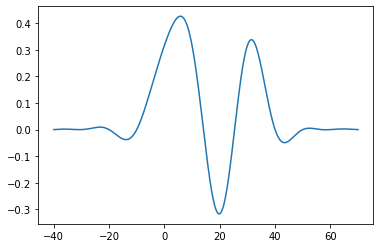

In [33]:
# Transmitted signal (noiseless)
symbols = np.array([1,1,-1,1])
beta = 0.5
Ts = 10
t0 = -40
tf = 70
step = (tf - t0) / num_samples
t = np.arange(t0, tf, step)
# Signal
x_p = get_signal(symbols,beta,Ts,t)
# Signal Energy
E = np.dot(x_p, x_p)

plt.plot(t, x_p)
plt.show()

In [34]:
# Signal Energy
E

121.09886768405823

In [35]:
PFA_THEO_MTF = np.zeros(len(SNR_list))
PFA_THEO_MTF2 = np.zeros(len(SNR_list))
PD_THEO_MTF = np.zeros(len(SNR_list))
PM_THEO_MTF = np.zeros(len(SNR_list))

PD_CALC_MTF = np.zeros(len(SNR_list))
PM_CALC_MTF = np.zeros(len(SNR_list))



# Evaluate the performance on H0 and H1
for ind, SNR in enumerate(SNR_list):
    N_FALSE_ALARM = 0
    N_DETECTION = 0
    N_MISS_DETECTION = 0

    sigma_w = np.sqrt(sigma_s ** 2 / 10 ** (SNR / 10))

    # Energy threshold calculation
    lambda_ = scs.norm.isf(P_FA) * np.sqrt(E*sigma_w**2)

    # Test static generation
    Tmf_y_0= generate_statisticMTF(num_stats, x_p, sigma_s, sigma_w, False)
    Tmf_y_1= generate_statisticMTF(num_stats, x_p, sigma_s, sigma_w, True)

    if ind == 12:
      T1 = Tmf_y_1
      T0 = Tmf_y_0
  
    # Decision making (spectrum sensing)
    for T in Tmf_y_0:
        if T >= (lambda_):
            N_FALSE_ALARM += 1

    for T in Tmf_y_1:
        if T >= (lambda_):
            N_DETECTION += 1
        else:
            N_MISS_DETECTION += 1

    # Probabilities
    # Aproximations
    PD_CALC_MTF[ind] = N_DETECTION / num_stats
    PM_CALC_MTF[ind] = N_MISS_DETECTION / num_stats

    # Theorical
    PFA_THEO_MTF[ind] = P_FA
    PFA_THEO_MTF2[ind] = scs.norm.sf(x=lambda_, loc=0, scale=np.sqrt(E*sigma_w**2))
    PD_THEO_MTF[ind] = scs.norm.sf(x=lambda_, loc=E, scale=np.sqrt(E*sigma_w**2))
    PM_THEO_MTF[ind] = scs.norm.cdf(x=lambda_, loc=E, scale=np.sqrt(E*sigma_w**2))

De la gráfica siguiente se observa claramente que el estadístico de prueba sigue el comportamiento de una variable aleatoria Gaussiana.

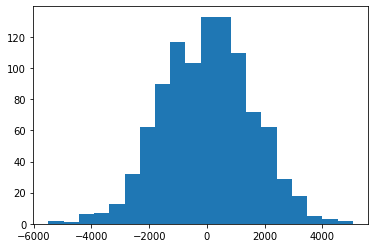

In [36]:
plt.hist(T0, bins=20)
plt.show()

In [37]:
# Probability Table

print('PROBABILITY TABLE')
print('SNR                      Prob. of Detection                  Prob. of Miss-Detecciton')
print('-----------------------------------------------------------------------------------')

for _, snr in enumerate(SNR_list):

  print(snr, '                       ', round(PD_THEO_MTF[_],4), '                                ',round(PM_THEO_MTF[_],4))

PROBABILITY TABLE
SNR                      Prob. of Detection                  Prob. of Miss-Detecciton
-----------------------------------------------------------------------------------
-20                         0.2931                                  0.7069
-18                         0.3976                                  0.6024
-16                         0.5395                                  0.4605
-14                         0.7091                                  0.2909
-12                         0.8685                                  0.1315
-10                         0.9668                                  0.0332
-8                         0.9969                                  0.0031
-6                         0.9999                                  0.0001
-4                         1.0                                  0.0
-2                         1.0                                  0.0
0                         1.0                                  0.0
2          

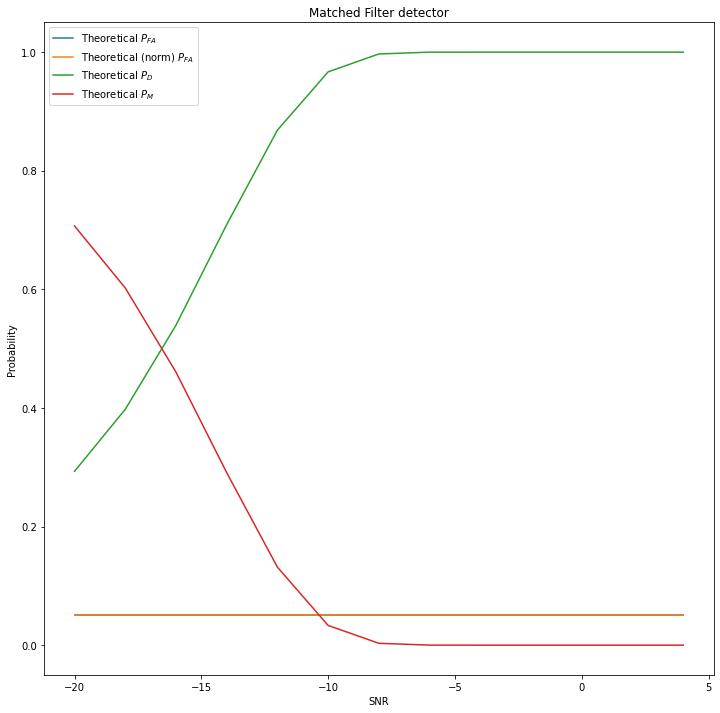

In [38]:
# Plot and save the results
plt.figure(figsize=(12,12))
plt.plot(SNR_list, PFA_THEO_MTF, label="Theoretical $P_{FA}$")
plt.plot(SNR_list, PFA_THEO_MTF2, label="Theoretical (norm) $P_{FA}$")
plt.plot(SNR_list, PD_THEO_MTF, label="Theoretical $P_{D}$")
plt.plot(SNR_list, PM_THEO_MTF, label="Theoretical $P_{M}$")
plt.xlabel("SNR")
plt.ylabel("Probability")
#plt.yscale('log')
plt.title("Matched Filter detector")
plt.legend()
plt.show()

Para los distintos $SNR$ planteados se advierte tanto de la tabla como de la gráfica que la probabilidad de detección correcta se incrementa en conjunto con la relación señal ruido. Para valores bajos de $SNR$ la probabilidad de que el resultado del test de hipótesis no sea el correcto es superior a la probabilidad de una detección correcta del canal sensado.

Cuando la relación señal-ruido es lo suficientemente grande, la probailidad de que el resultado del test de hipótesis sea correcto es prácticamente del 100%.

### Ventajas y desventajas de la técnica de Filtro Matcheado

La principal desventaja de este modelo respecto al detector de energía es que resulta necesario tener información preliminar a cerca de la señal/es que (usualmente) se transmite por el canal para poder construir el filtro. Sin embargo, si se dispone de los datos necesarios de la señal primaria para implementar el detector, el desempeño de este modelo es superior al del detector de energía dado que por su arquitectura maximiza la relación señal-ruido. 

Para el caso del detector de energía, el umbral de comparación toma como referencia la energía del ruido propio del canal, la cual, al ser el ruido una señal con comportamiento aleatorio, puede verse modificada abruptamente durante ciertos periodos de tiempo tomando valores muy superiores al umbral definido y llevando a que se produzca una detección por *falsa alarma* o que incluso al sumarse a la señal que se transmite modifique su estado de energía y produzca que se *pierda* la detección.

## Conclusiones: Detector de Energía vs. Filtro Matcheado

Como se pudo observar, existen diferencias en la performance de las dos técnicas para el sensado de espectro analizadas en este trabajo. En la gráfica siguiente es posible observar claramente que los resultados obtenidos para una baja relación señal-ruido en el modelo de filtro matcheado son mejores que las respuestas del detector de energía. Sin embargo, como también ya se discutió, implementar un sistema de sensado por filtro matcheado requiere que se cumplan ciertas condiciones repecto a la utilización del canal, específicamente las señales transmitidas por el ancho de banda que está siendo sensado deben ser similares entre sí tal que se pueda tomar una señal de referencia para construir la respuesta del filtro del sistema detector.


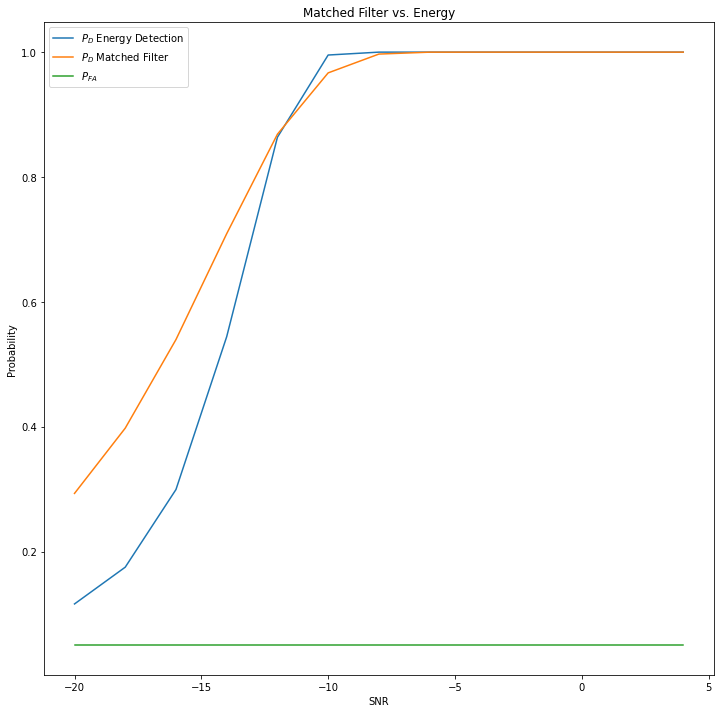

In [39]:
plt.figure(figsize=(12,12))
plt.plot(SNR_list, P_D_THEO, label="$P_D$ Energy Detection")
plt.plot(SNR_list, PD_THEO_MTF, label="$P_D$ Matched Filter")
plt.plot(SNR_list, P_FA_THEO, label="$P_{FA}$")
plt.xlabel("SNR")
plt.ylabel("Probability")
plt.title("Matched Filter vs. Energy")
plt.legend()
plt.show()

Ahora bien, la performance de un detector de energía puede mejorar considerablemente dependiendo de la precisión con la que se determina el threshold de comparación, el problema que se presenta es que dado que la referencia para el cálculo del umbral es el nivel de ruido del canal y este cambia aleatoriamente, un umbral que se adecúa perfectamente para un tiempo de análisis, puede no ser el correcto para un tiempo de sensado posterior razón por la que resulta necesario recalcular el umbral de desición prácticamente de forma permanente. No obstante, el beneficio de emplear este tipo de sistema de detección es que no se requiere de ningún tipo de condición o conocimiento previo sobre el espectro de frecuencias para su implementación.

A partir del análisis realizado se puede concluir que el desempeño de los sistemas de sensado de espectro dependen principalmente de la correcta definición del umbral que determina el resultado del test de hipótesis a efectuar. La alta precisión en el cálculo del mismo incrementa en gran medida la exactitud de la respuesta del sistema. Sin embargo la dependencia del umbral a utilizar tanto del sistema de sensado empleado como de las condiciones del canal convierten la tarea en poco eficiente debido a que resulta necesario recalcular el mismo cada vez que se modifican alguno de dichos aspectos para ajustarlo a las nuevas condiciones de trabajo. 

Para superar este conjunto de dificultades se propone un modelo capaz de adaptar de forma automática el umbral de decisión a través de un algoritomo de aprendizaje generado por una red neuronal.

## Referencias

[1] kockaya K., Develi I. (2020). "Spectrum sensing in cognitive radio networks: threshold optimization and analysis". *J Wireless Com Network 2020*, 255. https://doi.org/10.1186/s13638-020-01870-7

[2] F. Salahdine H. E. Ghazi N. Kaabouch and W. F. Fihri. (2015). "Matched filter detection with dynamic threshold for cognitive radio networks". *International Conference on Wireless Networks and Mobile Communications (WINCOM). pp. 1-6*, doi: 10.1109/WINCOM.2015.7381345.

[3] Odhavjibhai B.A., Rana S. (2017). "Analysis of Matched filter based spectrum sensing in cognitive radio". *International Research Journal of Engineering and Technology (IRJET) Vol.4.*

[4] Abdulsattar M.A., Hussei Z.A. (2012). "Energy detection technique for spectrum sensing in Cognitive Radio: A Survey". *International Journal of Computer Networks & Communications (IJCNC) Vol.4, No.5*

[5] Zeng Y., Ying-Chang L., Hoang A.T, Zhang R. (2009). "A Review on Spectrum Sensing for Cognitive Radio: Challenges and Solutions". *EURASIP Journal on Advances in Signal Processing Vol. 2010*, doi:10.1155/2010/381465

[6] Thangalakshmi B., Bharathy G.T. (2016). "Matched Filter detection based spectrum sensing in Cognitive Radio Networks". *International Journal of Emerging Technology in Computer Science & Electronics (IJETCSE) Vol. 22*